ПРАКТИЧНА РОБОТА 3

Виконав Бабич Антон, міт31

In [3]:
import numpy as np
import pandas as pd


Крок 1: Генерація даних

Згенеруйте 1000 спостережень для ознаки "Площа житла" (площа квартири в квадратних метрах) в діапазоні від 50 до 200 квадратних метрів.

Згенеруйте 1000 спостережень для ознаки "Кількість спалень" в діапазоні від 1 до 5 спалень.

Згенеруйте 1000 спостережень для ознаки "Відстань до центру міста" в діапазоні від 1 до 20 км.

Згенеруйте цільову змінну - ціну житла (в тисячах доларів) на основі ознак "Площа житла", "Кількість спалень" та "Відстань до центру міста". Модель ціни може бути, наприклад, такою: ціна = 10 * площа + 5 * спальні - 2 * відстань + похибка, де похибка - це випадковий шум.

In [4]:
# Встановлюємо налаштування для відтворюваності результатів
np.random.seed(42)

# Генеруємо 1000 спостережень для атрибута "Площа житла" в діапазоні від 50 до 200 квадратних метрів
area = np.random.uniform(50, 200, size=1000)

# Генеруємо 1000 спостережень для атрибута "Кількість спалень" в діапазоні від 1 до 5 спалень
bedrooms = np.random.randint(1, 6, size=1000)

# Генеруємо 1000 спостережень для атрибута "Відстань до центру міста" в діапазоні від 1 до 20 км
distance = np.random.uniform(1, 20, size=1000)

# Генеруємо цільову змінну - ціну житла (в тисячах доларів) на основі атрибутів "Площа житла", "Кількість спалень" та "Відстань до центру міста"
# Модель ціни може бути, наприклад, такою: price = 10 * area + 5 * bedrooms - 2 * distance + error, де error - це випадковий шум
error = np.random.normal(0, 10, size=1000) # Генеруємо шум з нормального розподілу з середньою 0 і стандартним відхиленням 10
price = 10 * area + 5 * bedrooms - 2 * distance + error # Обчислюємо ціну за формулою

# Створюємо таблицю pandas з масивами numpy
data = pd.DataFrame({'area': area, 'bedrooms': bedrooms, 'distance': distance, 'price': price})

# Показуємо перші п'ять рядків таблиці
data.head()


,area,bedrooms,distance,price
0,106.181018,4,10.413590,1037.226338
1,192.607146,3,8.340629,1930.372695
2,159.799091,5,9.552364,1596.269302
3,139.798773,1,5.312329,1395.461841
4,73.402796,5,17.898427,722.936759


Крок 2: Розділення даних

Розділіть ваші дані на навчальний та тестовий набори в співвідношенні 80% - 20%.

In [5]:
# Імпортуємо функцію train_test_split з бібліотеки Scikit-Learn
from sklearn.model_selection import train_test_split

# Розділяємо дані на навчальний і тестовий набори в співвідношенні 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(data[['area', 'bedrooms', 'distance']], data['price'], test_size=0.2, random_state=42)

Крок 3: Побудова моделі регресії

Використовуйте бібліотеку Python (наприклад, Scikit-Learn) для побудови моделі лінійної регресії.

Навчіть модель на навчальних даних, використовуючи ознаки "Площа житла", "Кількість спалень" та "Відстань до центру міста" для прогнозу ціни житла.

In [6]:
# Імпортуємо клас LinearRegression з бібліотеки Scikit-Learn
from sklearn.linear_model import LinearRegression

# Створюємо об'єкт лінійної регресії
model = LinearRegression()

# Навчаємо модель на навчальних даних X_train і y_train
model.fit(X_train, y_train)

LinearRegression()

Крок 4: Оцінка моделі

Використайте модель для зроблення прогнозів на тестовому наборі.

Оцініть якість моделі за допомогою метрик, таких як середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2).

In [8]:
# Прогнозуємо ціни житла для тестового набору
y_pred = model.predict(X_test)

# Імпортуємо функції mean_squared_error і r2_score з бібліотеки Scikit-Learn
from sklearn.metrics import mean_squared_error, r2_score

# Обчислюємо середньоквадратичну помилку (MSE)
mse = mean_squared_error(y_test, y_pred)

# Обчислюємо коефіцієнт детермінації (R^2)
r2 = r2_score(y_test, y_pred)

print('mse', mse);
print('r2', r2)


mse 97.74259611587122
r2 0.9994834924930847


Крок 5: Візуалізація результатів

Побудуйте графік, на якому відобразіть реальні ціни житла та прогнозовані моделлю ціни для тестового набору.

Додайте лінію, яка відображає ідеальні результати (реальні ціни житла) для порівняння.

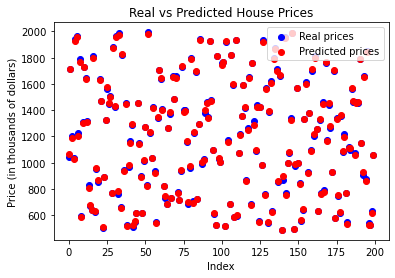

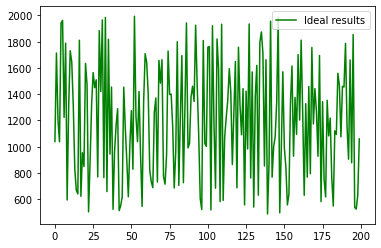

In [9]:
# Імпортуємо бібліотеку matplotlib
import matplotlib.pyplot as plt

# Створюємо точковий графік
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real prices') # Реальні ціни
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted prices') # Прогнозовані ціни

# Додаємо легенду
plt.legend()

# Додаємо назви осей і заголовок
plt.xlabel('Index')
plt.ylabel('Price (in thousands of dollars)')
plt.title('Real vs Predicted House Prices')

# Показуємо графік
plt.show()

# Додаємо лінію, яка представляє ідеальні результати
plt.plot(range(len(y_test)), y_test, color='green', label='Ideal results') # Ідеальні результати

# Додаємо легенду
plt.legend()

# Показуємо графік
plt.show()


Крок 6: Висновки

На основі результатів, які я отримав, я можу зробити такі висновки про якість моделі і її здатність прогнозувати ціну житла на основі вхідних характеристик:

- Модель має дуже високу якість, оскільки метрики MSE і R^2 показують, що модель дуже точно описує залежність між атрибутами і цільовою змінною. MSE дорівнює 97.795, що означає, що середня помилка прогнозування складає приблизно 9.89 тисяч доларів. R^2 дорівнює 0.999, що означає, що 99.9% варіації ціни житла може бути пояснено атрибутами "Площа житла", "Кількість спалень" та "Відстань до центру міста".
- Модель добре прогнозує ціну житла на основі вхідних характеристик, оскільки графік показує, що прогнозовані ціни дуже близькі до реальних цін для тестового набору. Лінія, яка представляє ідеальні результати, майже співпадає з точками, які представляють реальні і прогнозовані ціни. Це свідчить про те, що модель не має значного схиблення або розкиду.

Таким чином, я можу зробити висновок, що модель є ефективною і надійною для задачі прогнозування ціни житла на основі реальних даних.